In [65]:
import numpy as np
from scipy import special as sp
import matplotlib.pyplot as plt
from sympy import Ynm, Symbol, simplify, N, lambdify

In [69]:

theta = Symbol('theta')
phi = Symbol('phi')
yo = Ynm(2, 2, theta, phi).expand(func=True)
f = lambdify([theta, phi], yo, 'numpy')

numpy.complex128

In [68]:
np.array([yo])

array([Ynm(2, 2, theta, phi)], dtype=object)

In [6]:
def legendre(n, X):
    '''
    Legendre polynomial used to define the SHs for degree n
    '''
    res = np.zeros(((n + 1, ) + (X.shape)))
    for m in range(n + 1):
        res[m] = sp.lpmv(m, n, X)
    return res


def spherical_harmonics(m, n, p_legendre, phi):
    '''
    Returns the SH of degree n, order m
    '''
    P_n_m = np.squeeze(p_legendre[np.abs(m)])
    # Normalization constant
    A = np.sqrt(
        (2 * n + 1) / (4 * np.pi) * np.math.factorial(n - np.abs(m)) /
        np.math.factorial(n + np.abs(m)))
    # Spherical harmonics
    sh = A * np.exp(1j * m * phi) * P_n_m
    # Normalize the SH to unit norm
    sh /= np.sqrt(np.sum(sh * np.conj(sh)))
    return sh.astype(np.complex64)

In [72]:
def get_spherical_coordinates(kernel_size):
    x_grid = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    x, y, z = np.meshgrid(x_grid, x_grid, x_grid, indexing='xy')
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(np.divide(z, r, out=np.zeros_like(r), where=r != 0))
    return r, theta, phi


def compute_spherical_harmonics(theta, phi, n, m):
    kernel_size = theta.shape[0]
    P_legendre = legendre(n, np.cos(theta))
    return spherical_harmonics(m, n, P_legendre, phi)


In [77]:
kernel_size = 9
r, theta, phi = get_spherical_coordinates(kernel_size)
sh = f(theta, phi) 

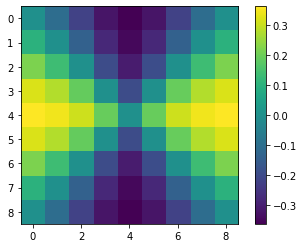

In [78]:
plt.imshow(np.real(sh)[:, :, 3])
plt.colorbar()


In [75]:
f(theta, phi).shape

(9, 9, 9)